# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [79]:
#pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [82]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
#from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [83]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [50]:
# Set the API base URL
#url = 'https://api.openweathermap.org/data/2.5/weather?'
url="http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = f"{url}q={city}&units=metric&appid={weather_api_key}"
    city_url =  url+"&q=" + city
    #print(city_url)

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
       # print(city_lng)
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | invercargill
Processing Record 4 of Set 1 | port saint john's
Processing Record 5 of Set 1 | spittal an der drau
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | todos santos
Processing Record 8 of Set 1 | praia da vitoria
Processing Record 9 of Set 1 | blackmans bay
Processing Record 10 of Set 1 | villa gesell
Processing Record 11 of Set 1 | acapulco de juarez
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | tafuna
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | toamasina
Processing Record 16 of Set 1 | luderitz
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | kruisfontein
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | longy

In [51]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          573
Lat           573
Lng           573
Max Temp      573
Humidity      573
Cloudiness    573
Wind Speed    573
Country       573
Date          573
dtype: int64

In [52]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.91,97,96,2.56,CL,1691632834
1,invercargill,-46.4000,168.3500,6.68,76,22,0.45,NZ,1691633102
2,port saint john's,-31.6229,29.5448,16.37,87,49,3.88,ZA,1691633103
3,spittal an der drau,46.8000,13.5000,16.36,95,62,1.57,AT,1691633103
4,waitangi,-43.9535,-176.5597,11.57,78,5,1.34,NZ,1691633103


In [53]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [54]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.91,97,96,2.56,CL,1691632834
1,invercargill,-46.4000,168.3500,6.68,76,22,0.45,NZ,1691633102
2,port saint john's,-31.6229,29.5448,16.37,87,49,3.88,ZA,1691633103
3,spittal an der drau,46.8000,13.5000,16.36,95,62,1.57,AT,1691633103
4,waitangi,-43.9535,-176.5597,11.57,78,5,1.34,NZ,1691633103


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

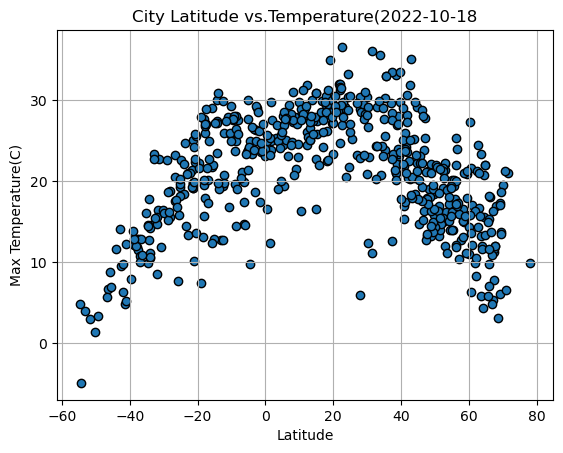

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Latitude vs.Temperature(2022-10-18")    
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

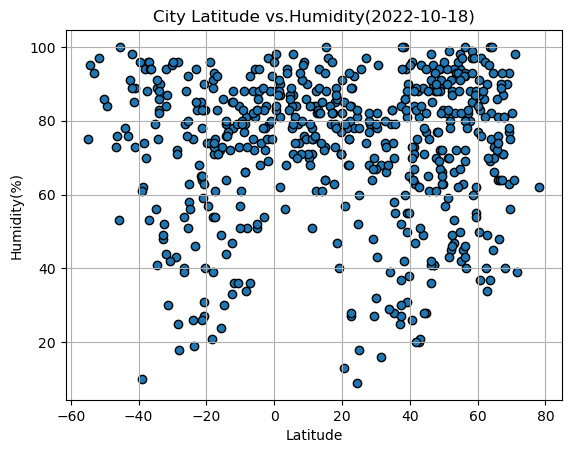

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title("City Latitude vs.Humidity(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

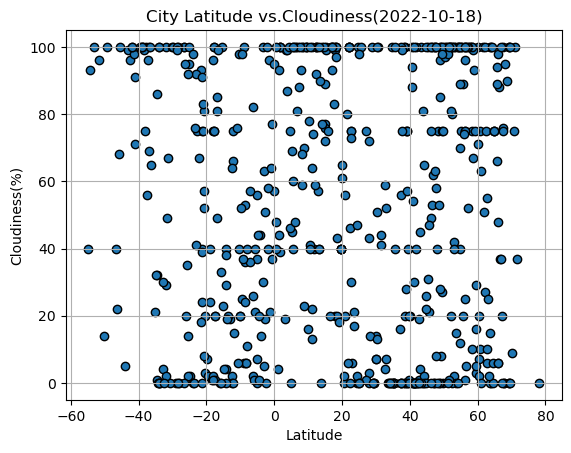

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Latitude vs.Cloudiness(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

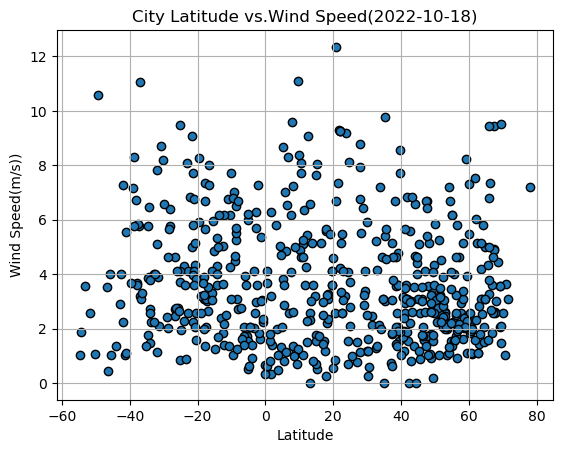

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"], marker="o", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s))")
plt.title("City Latitude vs.Wind Speed(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [65]:
# Define a function to create Linear Regression plots
def linear_reg(x_axis, y_axis,eq_loc):
    correlation= st.pearsonr(x_axis,y_axis)
    p_slope, p_int, p_r, p_p, p_std_err = st.linregress(x_axis, y_axis)
    p_fit= p_slope * x_axis + p_int
    eq= f"y ={p_slope: .2f}x +{p_int: .2f}"
    
    #plot line
    plt.scatter(x_axis, y_axis, marker="o")
    plt.plot(x_axis, p_fit,"--", color="red")
    plt.annotate(eq, eq_loc, fontsize=12, color="red")
    print(f"The r-value between {x_axis.name} and {y_axis.name} is {round(p_r*p_r,2)}")
    

In [66]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,spittal an der drau,46.8000,13.5000,16.36,95,62,1.57,AT,1691633103
5,todos santos,23.4500,-110.2167,29.13,78,17,3.21,MX,1691633104
6,praia da vitoria,38.7333,-27.0667,22.14,94,75,2.57,PT,1691633078
9,acapulco de juarez,16.8634,-99.8901,29.90,79,100,1.54,MX,1691633104
12,bilibino,68.0546,166.4372,16.92,40,95,3.00,RU,1691633105


In [67]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.91,97,96,2.56,CL,1691632834
1,invercargill,-46.4000,168.3500,6.68,76,22,0.45,NZ,1691633102
2,port saint john's,-31.6229,29.5448,16.37,87,49,3.88,ZA,1691633103
4,waitangi,-43.9535,-176.5597,11.57,78,5,1.34,NZ,1691633103
7,blackmans bay,-43.0167,147.3167,14.07,76,99,2.89,AU,1691633044


###  Temperature vs. Latitude Linear Regression Plot

The r-value between Lat and Max Temp is 0.44


Text(0, 0.5, 'Temperature(C)')

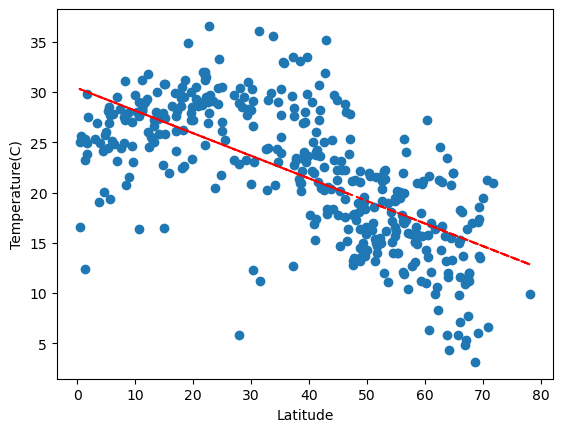

In [68]:
# Linear regression on Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],(10, -10))
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")

The r-value between Lat and Max Temp is 0.57


Text(0, 0.5, 'Temperature(C)')

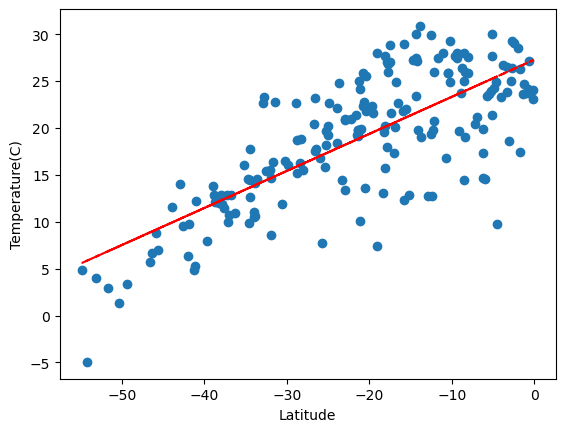

In [69]:
# Linear regression on Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],(10, -10))
plt.xlabel("Latitude")
plt.ylabel("Temperature(C)")

**Discussion about the linear relationship: In the northern hemisphere, a city's latitude and temperature have a positive correlation (0.44). The shouthern hemisphere also has a positive correlation (0.57). You could assume the the higher the latitude of the city, the higher the temperature the city would be.

### Humidity vs. Latitude Linear Regression Plot

The r-value between Lat and Humidity is 0.01


Text(0, 0.5, 'Humidity(%)')

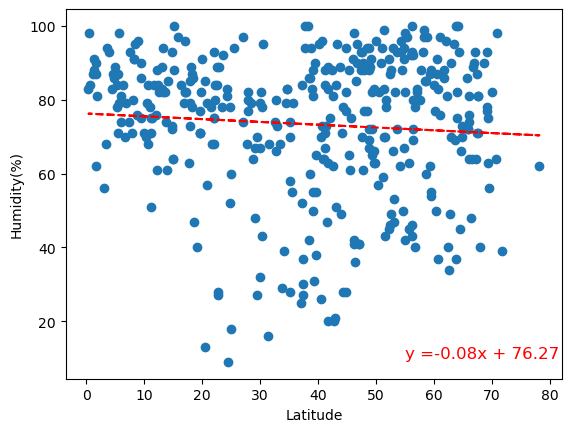

In [72]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], (55,10))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")                                                     

The r-value between Lat and Humidity is 0.0


Text(0, 0.5, 'Humidity(%)')

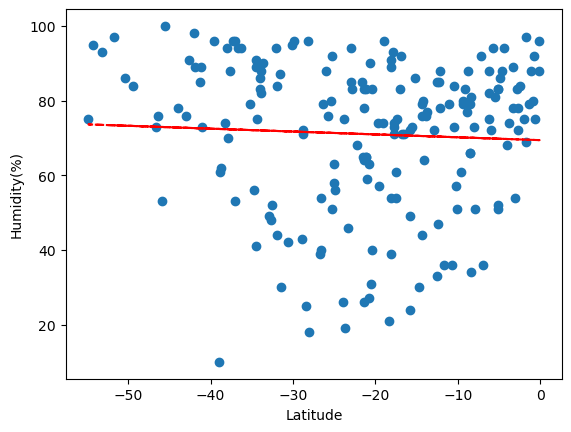

In [74]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], (55,10))
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")  

**Discussion about the linear relationship:** In the norhthern hemisphere, a city's latitude and humidity have weak positive correlation of 0.01. In the southern hemisphere there is no correlation of the city's latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value between Lat and Cloudiness is 0.01


Text(0, 0.5, 'Cloudiness(%)')

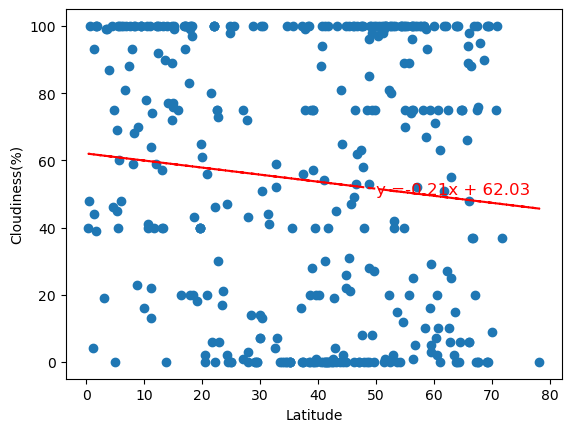

In [77]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], (50,50))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

The r-value between Lat and Cloudiness is 0.08


Text(0, 0.5, 'Cloudiness(%)')

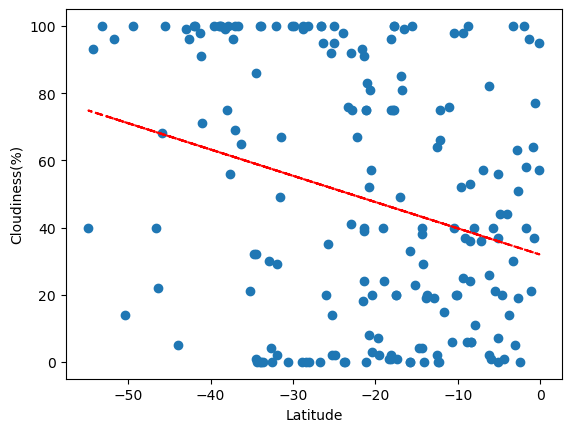

In [78]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], (50,50))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

**Discussion about the linear relationship:** In the northern hemispheres there is a weak positive correlation of (0.01). In the southern hemisphere there is a weak positive correlation of (0.08).

### Wind Speed vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
linear_reg(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], (10,12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

In [ ]:
# Southern Hemisphere
linear_reg(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], (10,12))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")

**Discussion about the linear relationship:** In the norhthern hemisphere, a city's latitude and humidity have weak positive correlation of 0.01. In the southern hemisphere there is no correlation of the city's latitude and humidity.